# Assignment #8: 🌲 (2/3)

Updated 2223 GMT+8 Oct 27, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>





>**说明：**
>
>1. **解题与记录：**
>
>     对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>2. **提交安排：**提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>3. **延迟提交：**如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。



## 1. 题目

### E108.将有序数组转换为二叉搜索树

https://leetcode.cn/problems/convert-sorted-array-to-binary-search-tree/

思路：
由于树的不同节点是同构的，可以递归生成。


代码：

```python
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> Optional[TreeNode]:
        if  not nums:
            return None
        m=len(nums)//2
        left=self.sortedArrayToBST(nums[:m])
        right=self.sortedArrayToBST(nums[m+1:])
        return TreeNode(nums[m],left,right)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
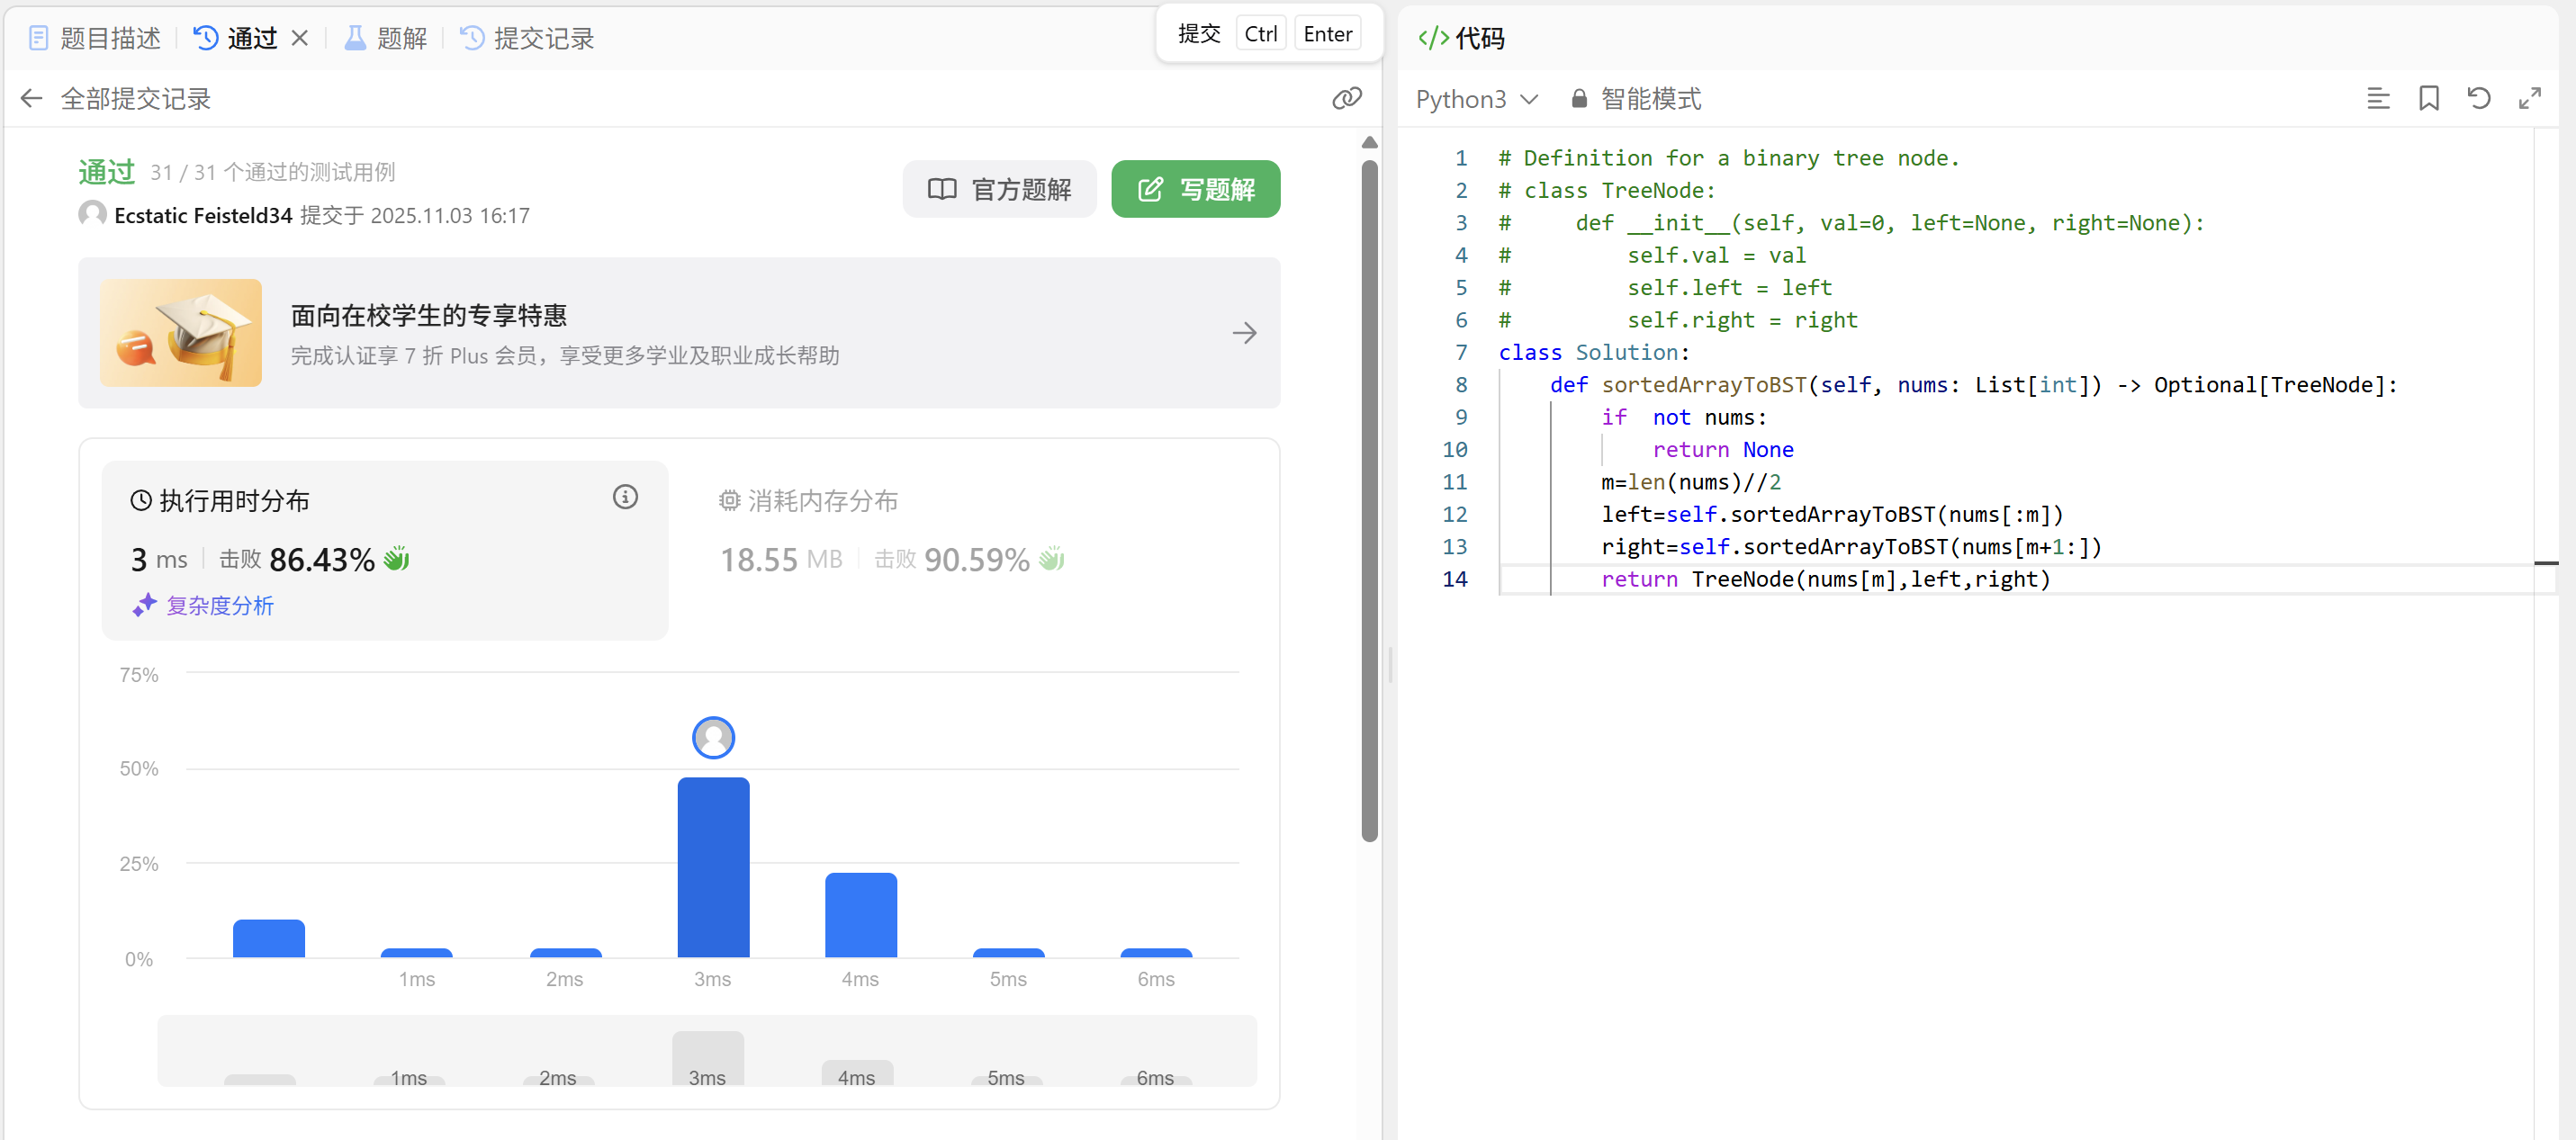




### M07161: 森林的带度数层次序列存储

tree, http://cs101.openjudge.cn/practice/07161/


思路：
先构建一个树，然后后根遍历


代码：

```python
from collections import deque

class TreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []

def build_tree(tokens):
    if not tokens:
        return None
    nodes=[]
    degrees=[]
    for i in range(0, len(tokens), 2):
        nodes.append(TreeNode(tokens[i]))
        degrees.append(int(tokens[i+1]))

    queue=deque()
    queue.append(0)
    idx=1 
    
    while queue and idx < len(nodes):
        parent_idx=queue.popleft()
        d=degrees[parent_idx]
        for _ in range(d):
            if idx >= len(nodes):
                break
            nodes[parent_idx].children.append(nodes[idx])
            if degrees[idx] > 0:
                queue.append(idx)
            idx += 1  
    return nodes[0]

def postorder_traversal(root, result):
    if not root:
        return
    for child in root.children:
        postorder_traversal(child, result)
    result.append(root.val)


n = int(input().strip())
forest_roots = []

for _ in range(n):
    tokens = input().split()
    root = build_tree(tokens)
    forest_roots.append(root)

result = []
for root in forest_roots:
    postorder_traversal(root, result)
print(' '.join(result))
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
![alt text](image.png)




### M27928: 遍历树

 adjacency list, dfs, http://cs101.openjudge.cn/practice/27928/

思路：



代码：

```python

```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>





### M129.求根节点到叶节点数字之和

dfs, https://leetcode.cn/problems/sum-root-to-leaf-numbers/

思路：
仍然使用递归进行计算，用x保留前面节点的数值之和


代码

```python
class Solution:
    def sumNumbers(self, root: Optional[TreeNode]) -> int:
        ans = 0
        def dfs(node: Optional[TreeNode], x: int) -> None:
            if node is None:
                return
            x = x * 10 + node.val
            if node.left is None and node.right is None:
                nonlocal ans
                ans += x
                return
            dfs(node.left, x)
            dfs(node.right, x)
        dfs(root, 0)
        return ans
```



代码运行截图<mark>（至少包含有"Accepted"）</mark>
![alt text](image-1.png)




### M24729: 括号嵌套树

dfs, stack, http://cs101.openjudge.cn/practice/24729/

思路：
把树构建出来，然后直接前序遍历和后序遍历


代码

```python
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []

def parse_tree(s):
    if not s:
        return None
    root_val = s[0]
    root = TreeNode(root_val)
    if len(s) == 1:
        return root
    content = s[2:-1]
    children_parts = split_children(content)
    for part in children_parts:
        child_node = parse_tree(part)
        if child_node:
            root.children.append(child_node)
    
    return root

def split_children(content):
    parts=[]
    balance=0
    start=0
    
    for i, char in enumerate(content):
        if char == '(':
            balance += 1
        elif char == ')':
            balance -= 1
        elif char == ',' and balance == 0:
            parts.append(content[start:i])
            start = i + 1
    if start < len(content):
        parts.append(content[start:])
    
    return parts

def preorder(root, result):
    if not root:
        return
    result.append(root.val)
    for child in root.children:
        preorder(child, result)

def postorder(root, result):
    if not root:
        return
    for child in root.children:
        postorder(child, result)
    result.append(root.val)

input_str = input().strip()
root = parse_tree(input_str)

pre_result = []
post_result = []

preorder(root, pre_result)
postorder(root, post_result)

print(''.join(pre_result))
print(''.join(post_result))
```



代码运行截图<mark>（至少包含有"Accepted"）</mark>
![alt text](image-2.png)




### T02775: 文件结构“图”

tree, http://cs101.openjudge.cn/practice/02775/

思路：



代码：

```python

```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>



## 2. 学习总结和个人收获

学习了关于树的构建以及处理，树的各个节点是同构的，因此大多使用递归进行处理。




